In [1]:
import brightway2 as bw
import pandas as pd
import numpy as np

In [2]:
bw.projects.set_current('GSA for ecoinvent')
co = bw.Database('CH consumption 1.0')
average_consump = co.search('average consumption')[0]

In [3]:
average_consump

'ch hh average consumption' (1 month of consumption, CH, None)

In [4]:
list_functional_units = []
for exc in average_consump.exchanges():
    list_functional_units.append({exc['input']: exc['amount']})
        
list_methods = [('IPCC 2013', 'climate change', 'GTP 100a')]

In [5]:
bw.calculation_setups['av_consump_contribution_analysis'] = {'inv':list_functional_units, 'ia':list_methods}

In [6]:
%%time
myMultiLCA = bw.MultiLCA('av_consump_contribution_analysis')

CPU times: user 4min 29s, sys: 23.4 s, total: 4min 52s
Wall time: 1min 22s


In [7]:
lcia_unit = bw.Method(list_methods[0]).metadata['unit']

In [10]:
fus = [bw.get_activity(list(el.keys())[0])['name'][:25] for el in list_functional_units]
df = pd.DataFrame(index=fus, columns=[lcia_unit], data=myMultiLCA.results)
df['exchanges'] = [list(fu.values())[0] for fu in list_functional_units]
df['units'] = [bw.get_activity(list(el.keys())[0])['unit'] for el in list_functional_units]


In [15]:
df.sort_values(lcia_unit, ascending=False, inplace=True)

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                              kg CO2-Eq   exchanges                   units
ch hh average consumption  42241.179760    1.000000  1 month of consumption
Medicines                   5730.665010   40.823188                     CHF
Other products for person   5049.411053   35.970181                     CHF
Detergents and cleaning p   2932.607771   20.890839                     CHF
Tools and equipment witho   1221.763986   30.048820                     CHF
Refrigerators, dishwasher   1098.131331   17.756131                     CHF
Furniture and furnishings   1094.236133  116.197564                     CHF
Garments for women          1065.131506  103.789802                     CHF
Hair care products          1015.224370    7.232092                     CHF
Medical products, therape    997.446101    7.969828                     CHF
Premiums for life insuran    952.384666  287.578522                     CHF
Cookers, barbecue, space     827.089825   13.373551                     CHF
Regular main

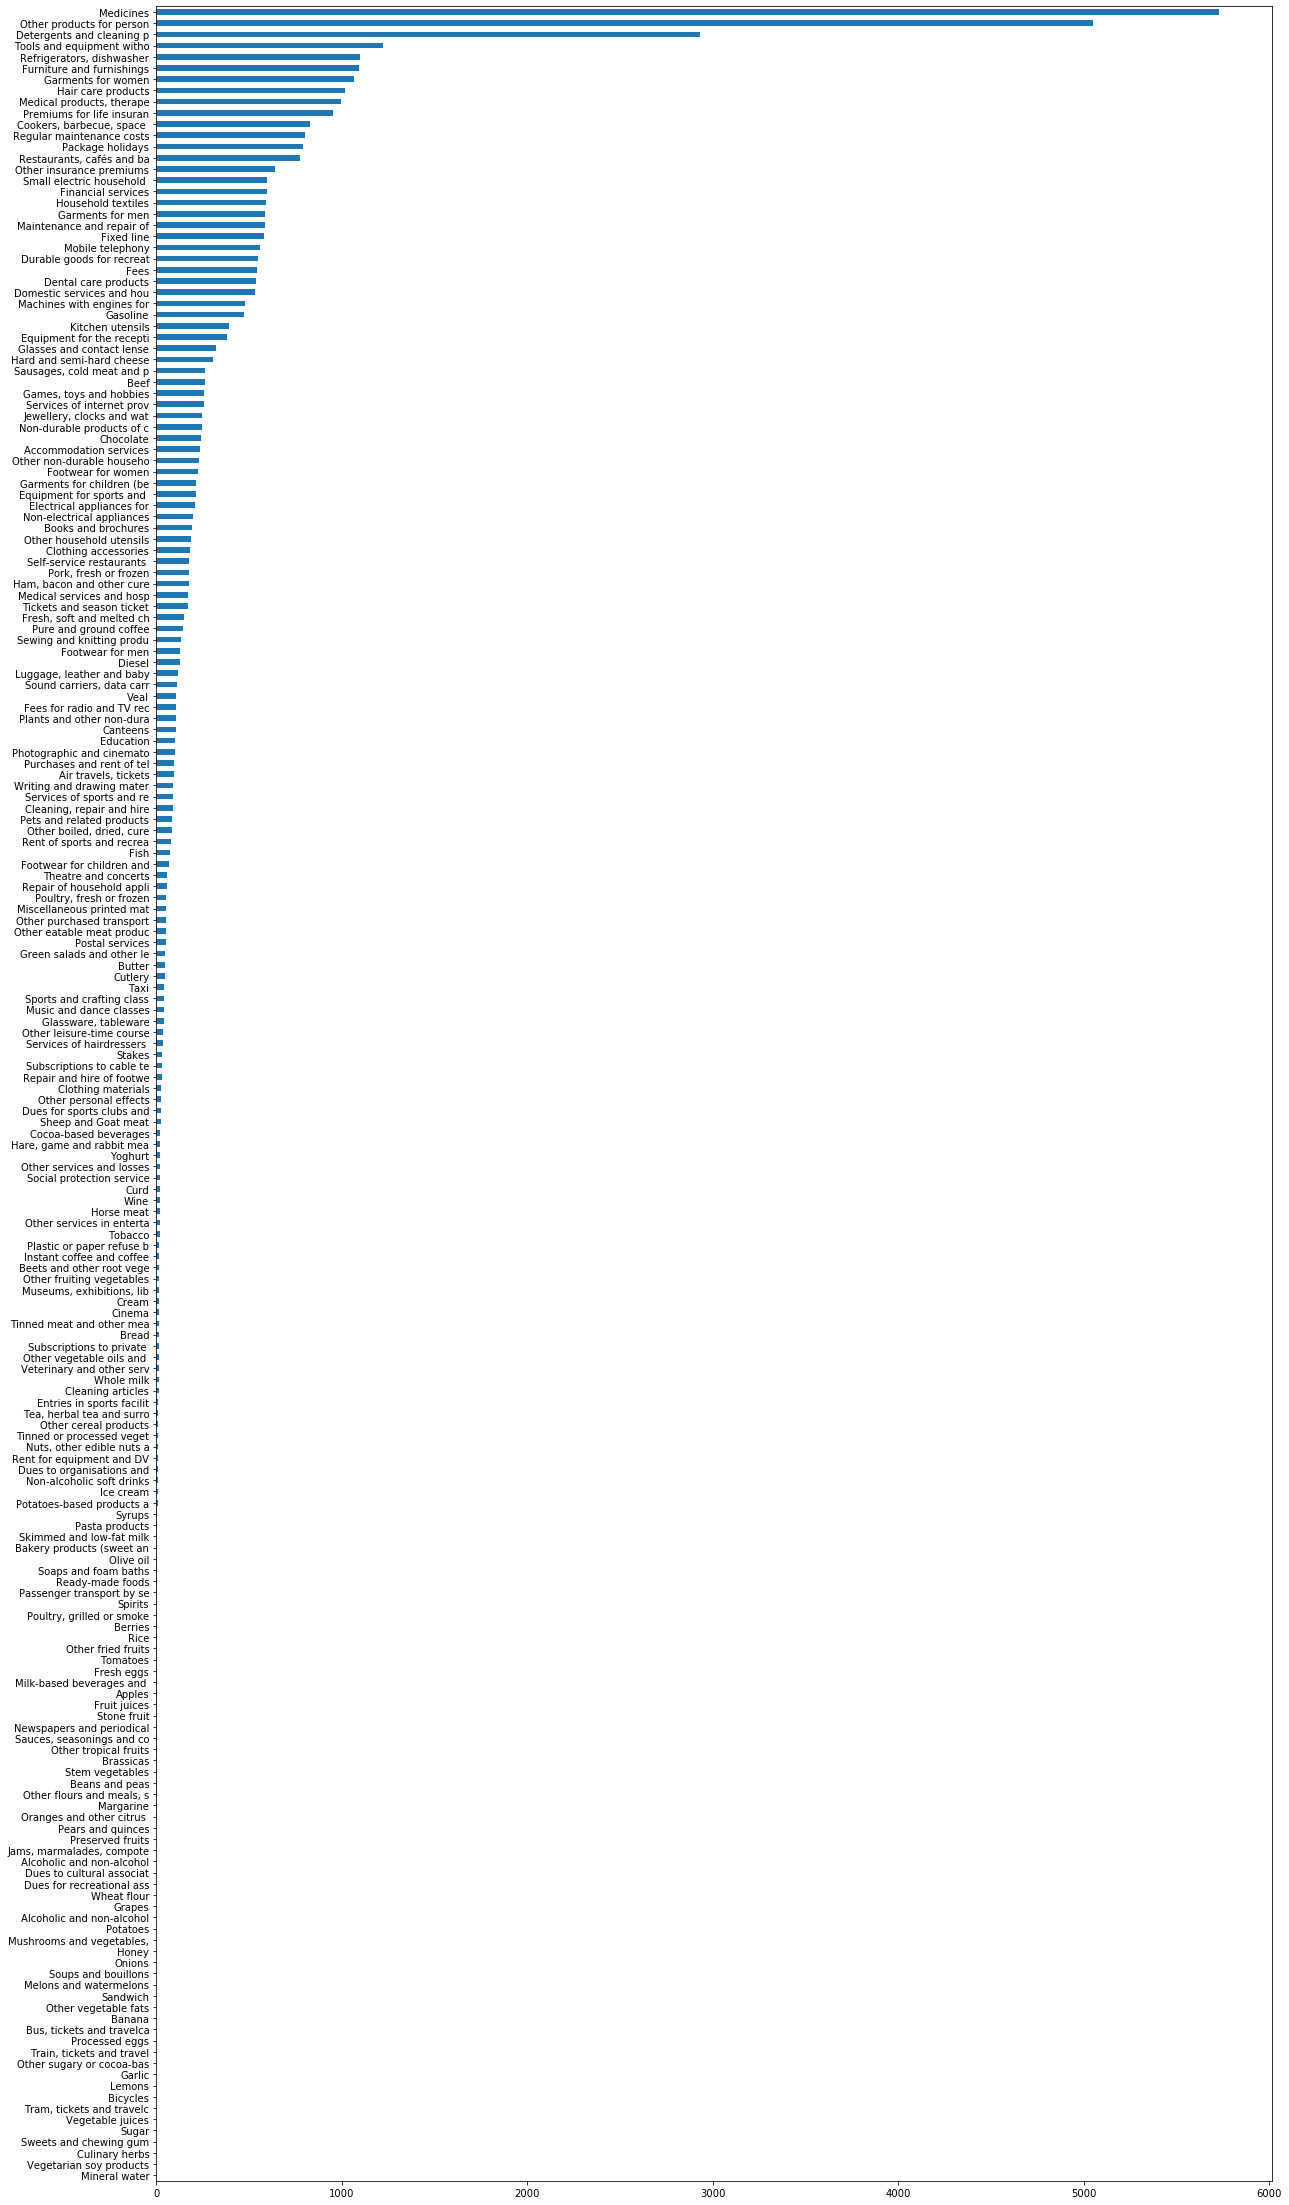

In [40]:
df_ = df.drop('ch hh average consumption')
df_ = df_.sort_values(lcia_unit)
df_['kg CO2-Eq'].plot.barh(figsize=(20,40))

In [34]:
df_.plot.barh?